# 时间序列分析：美国 SP500 指数

本讲将使用 Python 中的 `yfinance` 库在线获取美国 SP500 指数的时间序列数据，并结合 pandas 库进行数据处理与可视化。随后，我们将利用 `statsmodels` 库中的 ARIMA 模型分析美国 SP500 指数的时序特征；进而使用 `arch` 库分析其波动特征。


[*********************100%***********************]  1 of 1 completed

1 Failed download:
['^GSPC']: YFRateLimitError('Too Many Requests. Rate limited. Try after a while.')


Empty DataFrame
Columns: [(Adj Close, ^GSPC), (Close, ^GSPC), (High, ^GSPC), (Low, ^GSPC), (Open, ^GSPC), (Volume, ^GSPC)]
Index: []


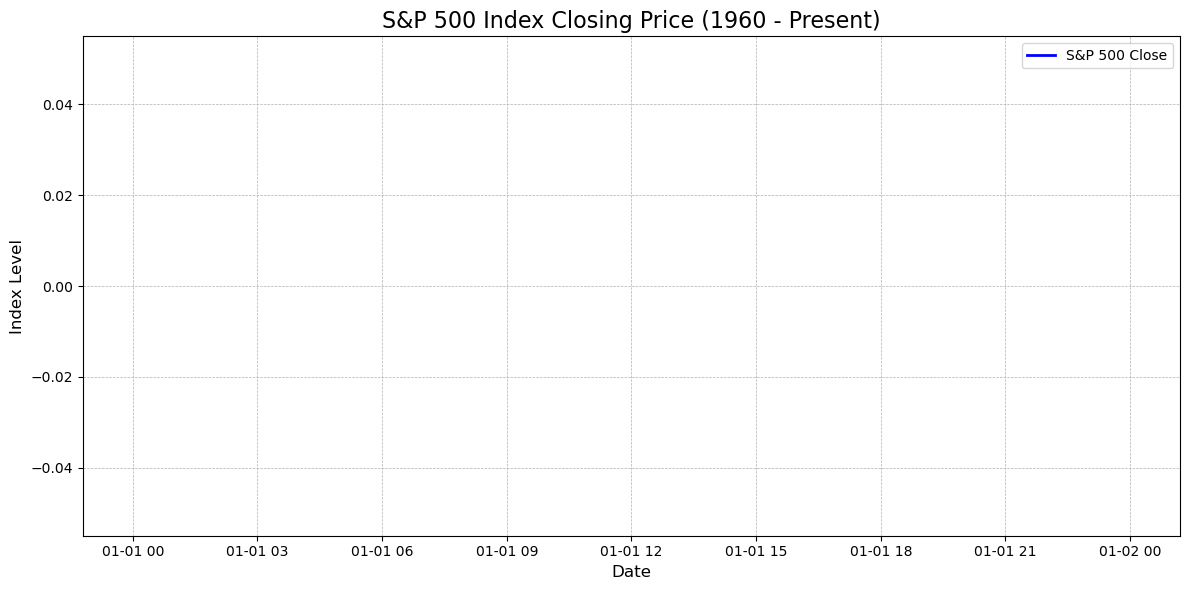

In [9]:
import yfinance as yf
import pandas as pd
import datetime
import matplotlib.pyplot as plt

# 设置起止日期
start_date = datetime.datetime(1960, 1, 1)
end_date = datetime.datetime.today()
start_year = start_date.year

# 下载 SP500 指数数据，代码为 "^GSPC"
sp500 = yf.download("^GSPC", start=start_date, end=end_date)

# 查看前几行数据
print(sp500.head())

# 绘制收盘价趋势图
plt.figure(figsize=(12, 6))
plt.plot(sp500.index, sp500["Close"], label="S&P 500 Close", color="blue", linewidth=2)
plt.title(f"S&P 500 Index Closing Price ({start_year} - Present)", fontsize=16)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Index Level", fontsize=12)
plt.grid(True, linestyle='--', linewidth=0.5)
plt.legend()
plt.tight_layout()
plt.show()


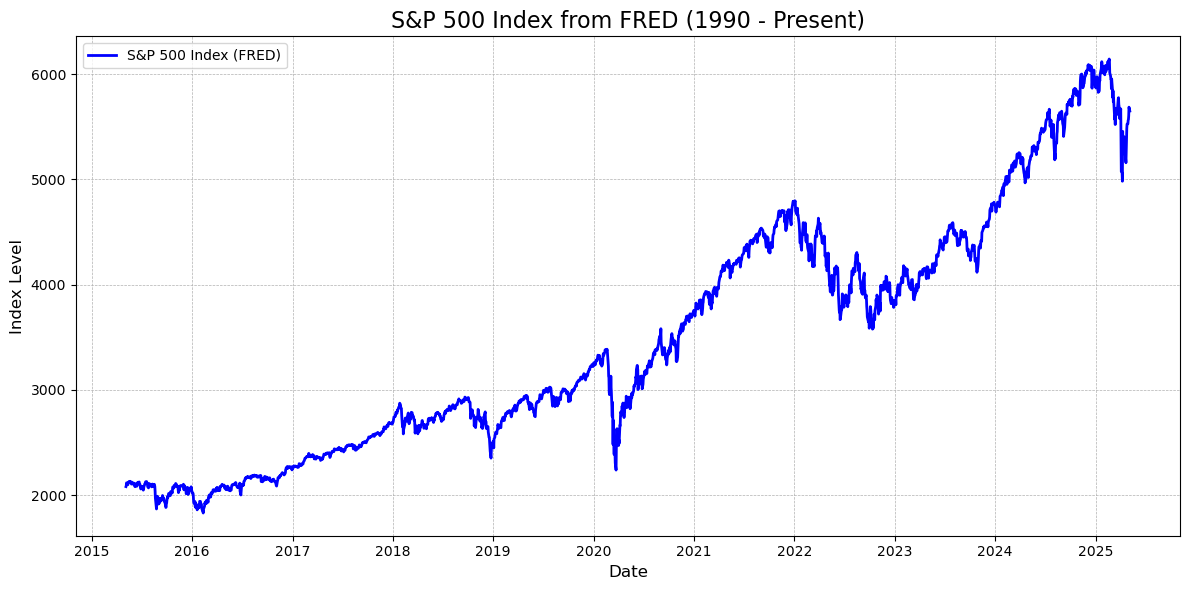

In [10]:
import pandas as pd
from pandas_datareader.data import DataReader
import datetime
import matplotlib.pyplot as plt

# 设置起止日期
start_date = datetime.datetime(1990, 1, 1)
end_date = datetime.datetime.today()
start_year = start_date.year

# 使用 FRED 获取 SP500 指数（代码为 "SP500"）
df = DataReader("SP500", "fred", start_date, end_date)

# 删除缺失值
df = df.dropna()

# 绘图
plt.figure(figsize=(12, 6))
plt.plot(df.index, df["SP500"], color='blue', linewidth=2, label='S&P 500 Index (FRED)')
plt.title(f"S&P 500 Index from FRED ({start_year} - Present)", fontsize=16)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Index Level", fontsize=12)
plt.grid(True, linestyle='--', linewidth=0.5)
plt.legend()
plt.tight_layout()
plt.show()
